# CS 110 Final Project

# Plagiarism Detector

### Milana Stetsenko

### April 2021

Assignment description: https://drive.google.com/file/d/1CPxvk9VUKFQ-D3H52UP1Bxe7azr2gj3Z/view


# Part 1 - mod division hashing 



### The Selection Procedure for Chaining vs Probing 


The modulus should be close to the difference from the longest string with k. This number is the number of strings that will be stored in the hash table. Since probing resolution technique works better when the load factor is no more than 80%, I am dividing this number by 75% to gain an estimated size of the hash table that is of a good side for efficient hashing. Since modulus choice should be a prime number for more distributed hashing, I find the closest prime number that is higher then the current proposed size of the hash table. 


Since the base of the hash value is 10, there is a limited range in which the computed hash value prior to modulus division occurs. For instance, if k=3, then, based on the hash function, the values will be in almost all cases below 10,000 = $10^{(k+1)}$. If the size of the string is very large - 100,003 symbols which will result in 100,000/0.75 potential strings. If we chose the size close to the size of the string, then the indices calculated will be within the only first 10,000 (because $\frac{10,000}{100,000} = 10,000$ for any value instead of 10,000 which is smaller than the denominator. 

As a result, even though the hash size allows to store approximately 133,333 spots, but the indices will be only in the first 10,000. The load factor remains low but the collisions will happen very often in the 10,000 indices only. Therefore, if the number of potential strings is much higher than the approximate upper bound of the indices value, I decided to implement a chaining technique instead. 

The algorithm manages this choice in the way that I explained above. 


### The Selection of Modulus Value

I am using the algorithm by Sieve of Sundaram to calculate the prime values and then use binary search to find the closest value that is higher than the initial proposed size of the hash table, if the size of the hash table is bigger than 10^4 - the upper bound of the list of prime values, the largest one is selected and then chaining technique is chosen instead if the load will be high to resolve the collisions. 



### Complexity Analysis

Let len(x) = n and len(y) = m


1. The first helper function called is the string preformatting converting the inputs to only lowercase string with alphabetic values. It has the complexity of the input size, therefore, the complexity is $\Theta(n+m )$. 

2. The time complexity of the mod_calculator() function is $\Theta(n log n )$ because of the Sieve's algorithm being O(n log n) and binary search of O(log n). N would be the size of x and the size of the hash function. 

3. The initialization of the hash function is proportional to the input of X. Asymptotically, the complexity should be $\Theta(n)$


4. Next is the for loop to build the has table which runs over the substrings of x. Therefore, it has a complexity of $\Theta(n)$

5. The function to convert the string to the integer runs in constant time 

6. The function to push the string to the hash table is a constant runtime, assuming that there are few collisions. Based on the performance of the elements per bucket, this assumption can be put in place and simplified to $O(1)$

7. The next part of the code is the lookup - it also includes a for loop. Therefore, the complexity is $\Theta(m)$

8. The function to convert the string to the integer runs in constant time 

9. The lookup is proportinal to the load factor a which is the nummber of elements in y and the size of the hash table. $\Theta(1+ a)$



Combining all these steps, the complexity should be $\Theta(n log n + m )$. The algorithm can be improved to only
$\Theta(n + m )$ if the primary number function is replaced by a database or a faster technique. 


The algorithm is efficient and the fast runtime on the large input proves that. 

In [1]:
##HELPER FUNCTIONS
def convert_str_to_int(substring):
    """
    Converts the string into an integer with the base of 10.
    
    input: the substring that we want to convert as a integer
    output: the integer corresponding to the string 
    """
    
    #base of 10
    d = 1
    #initializing the output
    integer = 0
    
    #add the ord() of each element multiplied by a base 10
    for char in substring[::-1]:
#         print(char)
#         print(ord(char))
        integer+= d*ord(char)
        d*=10
        
        
    return integer



#some tests to make sure the function is working as intended
assert(convert_str_to_int("hi")) == 1145 
assert(convert_str_to_int("hm")) == 1149




    
def hash_next_substring(current_hash_value, first_element, following_element, mod, k, d):
    """
    Returns a hash value of the next substring: the first character is removed and the next character is added
    to the substring
    
    Input:
    current_hash_value: the hash value of the substring that we have computed
    
    first_element: the first character of the current substring so that we can remove it
    
    following_element: the next character that should be added to the substring after the first one 
    is removed
    
    mod - the selected mod - a prime number 
    
    k - the length of the substring
    
    d - base 
    Output: 
    
    the hash value of the next subtring"""
    
    #append the following_element to the current string and get its hash_value
    appended = (current_hash_value*d+ord(following_element))%mod
    
    
    #remove the first value (uses the new hash value and the first letter)
    
    removed = (appended - ord(first_element)*((d**k)%mod))%mod

    
    #output the new hash value
    
    return removed


#the test case from the summary
assert(hash_next_substring(1, "t", "a", 10, 3, 7)) == 6


#the test case for the substring 'day'
assert(hash_next_substring(6, "o", "y", 10, 3, 7)) == 0




import math
def closest_prime_number(n):
    
    """
    
    Code is adapted from: https://www.geeksforgeeks.org/nearest-prime-less-given-number-n/
    using Sieve of Sundram's utility function and binary search
    
    
    The function to find the closest prime number larger than the value of n to identify the mod
    
    Input: n (int) - the proposed size of the hash table - not necessarily prime number
    
    Ouput: mod - the size of the hash table
    """




    # array to store all primes less
    # than 10^6
    primes = []

    #Sieve of Sundaram method
    def Sieve():

        n = 10001

        # In general Sieve of Sundaram, produces
        # primes smaller than (2*x + 2) for a 
        # number given number x
        nNew = int(math.sqrt(n))

        # This array is used to separate numbers
        # of the form i+j+2ij from others where 
        # 1 <= i <= j
        marked = [0] * (int(n / 2 + 500));

        # eliminate indexes which does not
        # produce primes
        for i in range(1, int((nNew - 1) / 2) + 1):
            for j in range(((i * (i + 1)) << 1), 
                            (int(n / 2) + 1), (2 * i + 1)):
                marked[j] = 1;

        # Since 2 is a prime number
        primes.append(2);

        # Remaining primes are of the form 
        # 2*i + 1 such that marked[i] is false.
        for i in range(1, int(n / 2) + 1):
            if (marked[i] == 0):
                primes.append(2 * i + 1);


    
    def binarySearch(l, r, n):
        
        #find the midle value
        if (l <= r):
            mid = int((l + r) / 2);

            
            
            #base case - we reached either of the adges of the list
            if (mid == 0 or mid == len(primes) - 1):
                return primes[mid];

            
            #when our n is a prime number, return itslef 
            if (primes[mid] == n):
                return primes[mid];

            
            #if current is smaller but next prime is large, we found mod
            if (primes[mid] < n and primes[mid + 1] > n):
                return primes[mid+1];
            
            
            #did not find the prime, so go into the right half of the list
            if (n < primes[mid]):
                return binarySearch(l, mid - 1, n)
            else:
                return binarySearch(mid + 1, r, n)

        return 0;


    #output the results
    Sieve()
#     print(primes)
    mod = binarySearch( 0, len(primes) - 1, n)
#     print('mod', mod)
    return mod
    
    
assert (closest_prime_number(100)) == 101
assert (closest_prime_number(17)) == 17


def mod_calculator(k, x_len, d):
    
    '''Calculates the mod of the hash table and selects the appropriate collisison resolution technique. 
    
    
    Input: 
    k - the length of the substring
    
    x_len - the length of the longer subtring
    
    d - the base of the hash function
    
    
    Output: (mod, collisions)
    
    mod (int)  - the mod of the hash function
    
    collisions (str) - the type of collision resolution technique
    
    
    
    Comments:
    d**(k+1) would be the higher bound of the available hash values, 
    if k == 3 and d = 10, then d**(k+1)= 10,000 and almost no hash values will be higher than 10,000
    because of the nature of the hash function.\
    
    Therefore, the hash table will contain value only in first d**(k+1) indeces of table. 
    So this should be the size of the hash table then and if the number of possible substrings
    is larger, then the collision resolution should be chaining.
    '''

    
    #find the number of the substrings to be inserted
    number_of_strings = x_len - k
    
    
    #increase the size of the hash table so that the number of substrings 
    #would fill 75% of the hash table to probing 
    adjusted_load_size = number_of_strings/0.75
    
    
    #find the closest prime number that is higher than the size of the Hash Table
    prime_size = closest_prime_number(adjusted_load_size)
    
    
    
    #find the upper bound of indeces keys for the hash table
    upper_bound = d**(k+1)
    
    
    
    #select the appropriate collision method and the size of the hash table
    #see the comment for rationale
    if  upper_bound < prime_size:
        collisions = "chaining"
        
        return (upper_bound, collisions)
        
    else:
        collisions = 'probing'
        
        return prime_size, collisions
    

In [2]:
## Functions to work with the hash tables - initialize and add tha value



def initialize_hash_table(N, collisions):
    """Creates an empty hash table"""
    
    if collisions == 'chaining':
        return [[] for n in range(N)]
    else:
        return [None for n in range(N)]



##Functions to select and perform the addition of the next string to the hash table

def chaining_add_to_hash_table(hash_table, current_hash_value, current_string, mod, index):
    
    """Adding to the hash table using chaining. """
    #insert to the correct index
#     print("hash_value inside", current_hash_value)
    hash_table[current_hash_value].append((current_string, index))
    return hash_table

def probing_add_to_hash_table(hash_table, current_hash_value, current_string, mod, index):
    
    """Adding to the hash table using the quadratic probing. """
    
    #bool value to keep probing until found the slot
    found_probing = False
    
    #iterator for the collissions i
    collisions = 0
    

    
    while not found_probing:
        #found the empty slot, terminate the loop
        if hash_table[current_hash_value] == None:
            hash_table[current_hash_value] = (current_string, index)
            found_probing = True
            
        #probe to the nexrt slot using the quadratic probing
        else:
            current_hash_value= (current_hash_value+ collisions**2)% mod
#             print('probing again',current_hash_value )
            collisions+=1
    

def add_to_hash_table(hash_table, current_hash_value, current_string, collisions, mod, index):
    """Driver function to select the right type of insertion in the hash table"""
    
    
    if collisions == 'chaining':
        chaining_add_to_hash_table(hash_table, current_hash_value, current_string, mod, index)
    else:
        probing_add_to_hash_table(hash_table, current_hash_value, current_string, mod, index)
 



#test driving the functions

mod = 100

index = 1
#tests on the chaining part of the code       
collisions = 'chaining'
hash_table = initialize_hash_table(mod, collisions)

add_to_hash_table(hash_table, 1, "a", collisions, mod, index)
add_to_hash_table(hash_table, 1, "b", collisions, mod, index)
# print(hash_table)


#tests on the probing part of the code       
collisions = 'probing'
hash_table = initialize_hash_table(100, collisions)

add_to_hash_table(hash_table, 1, "a", collisions, mod, index)
add_to_hash_table(hash_table, 1, "b", collisions, mod, index)
# print(hash_table)



def chaining_contains(hash_table, current_hash_value, current_string, mod):
    """The helper function that returns true if the current string is in the hash table
    Returns False otherwise"""
    #if element is in this index, return the list with the indeces
    result = []

    for el in hash_table[current_hash_value]:
   
        if el[0] == current_string:

            result.append(el[1])

    if len(result)==0:
        #return  False if not found
        return False
    else:
        return result


def probing_contains(hash_table, current_hash_value, current_string, mod):
    """The helper function that returns true if the current string is in the hash table
    Returns False otherwise"""
    result = []

        
        
    #bool value to keep probing until found the slot
    found_probing = False

    #iterator for the collissions i
    collisions = 0



    while not found_probing:
        #found the empty slot, terminate the loop 
        
#         print('hi loop')
#         print('current hash value', hash_table[current_hash_value])
        if hash_table[current_hash_value] == None:
#             print('found none')
            found_probing = True
            return result
        
        #found another occurence of the same substring, add the index 
        if hash_table[current_hash_value][0] == current_string:
            
#             print('found match', result,hash_table[current_hash_value] )

            if hash_table[current_hash_value][1] in result:
#                 print('found a loop', result)
                
                return result
            result.append(hash_table[current_hash_value][1])



        #probe to the next slot using the quadratic probing
        collisions+=1
        current_hash_value=(current_hash_value + collisions**2)% mod
#         print('probing again',current_hash_value )
        





    if hash_table[current_hash_value][0] == None:
#         print('found none')
        return False

        
    

def contains(hash_table, current_hash_value, current_string, collisions, mod):
    
    """The driver function to check whether the current string is present in the hash table
    
    Returns True if the value was found, false if the value was not found"""
    
    if collisions == 'chaining':
        return chaining_contains(hash_table, current_hash_value, current_string, mod)
    else:
        return probing_contains(hash_table, current_hash_value, current_string, mod)

In [3]:
#string pre-formatting function
def input_string_preformatting(x):
    """
    This function preformats the string into an object with only the lowercase letters. 
    
    The code is recycled from the previous assignment. 
    """
    bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']', "’", ':', '-']

    formatted_text  = ''.join(c for c in x if c not in bad_chars)
    
    formatted_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in formatted_text)
    formatted_just_words = [word for word in formatted_without_newlines.split(" ") if word != ""]
    string = "".join(formatted_just_words)[:10000]
    s = string.lower()
    
    return s

In [4]:
def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
    - x, y: strings
    - k: int, length of substring
    
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    
    #initiazlizing the output list storing the start indeces from the both lists
    output = []
    
    #the base of the hash function, can be changed and the code adjusts
    d = 10 
    
    x = input_string_preformatting(x)

    y = input_string_preformatting(y)
    #find the longer list to create the hash table from 
    #initialize a longer list to x
    len_x = len(x)
    len_y = len(y)
    if len_y> len_x:
        x,y = y,x
    
    
    ##### Calculate the mode and select a collision technique
    mod, collisions = mod_calculator(k, len_x, d)
    

    #create empty hash table
    hash_table = initialize_hash_table(mod, collisions)
    
    
    
    #for loop iterating over the starting index of the current string until the first character of the last string
#     print(len(x)-k+1)
    for start in range(len(x)-k+1):
        #update the current string
        current_string = x[start: start+k]

        
        #initialize current hash_value
        current_hash_value = convert_str_to_int(current_string)%mod
        

        
        #add the current string to the hash table based on collision resolution
        add_to_hash_table(hash_table, current_hash_value, current_string, collisions, mod, start)






    ##COMPARING THE SHORT Y TO THE LONG X
    
    #for loop iterating over the starting index of the current short 
    #string until the first character of the last string

    for start in range(len(y)-k+1):

        #update the current string
        current_string = y[start: start+k]

        
        #initialize current hash_value
        current_hash_value = convert_str_to_int(current_string)%mod
        
        
        #lookup the hash value of the in hash table 
        lookup = contains(hash_table, current_hash_value, current_string, collisions, mod)

        
    
        #did not find a match in the correct hash index, so go to the next substring
        if lookup == False or lookup ==None:
          
            continue
            
            
        #add all the pairs of indeces from this iteration
        for index in set(lookup):

                output.append((index, start))
            
    return output

In [5]:
#some test cases 

#testcase with the repeating part of the text
x = 'Today is Monday:'
print(rh_get_match(x, 'day', 3))


#text cases with very similar input
x = 'helo hello'
y = "hello"
print("-----")
print(rh_get_match(x, y, 5))



from requests import get
shakespeare = get('http://bit.ly/CS110-Shakespeare').text

# a longer string, manual checked all the element using ctrl+f and it finds the correct substrings
x = shakespeare[:9000]
y = "completework"
print("-----")
print(rh_get_match(x, y, 4))


#longer string, the output is very long, check selectively some substrings from both inputs and they work
x = shakespeare[:9000]
y = "tersshallbesiegethybrowanddigdeeptrenchesinthybeautysfieldthyyouthsproudliverysogazedonnowwillbeatatteredweedofsmal"
print("-----")
# print(rh_get_match(x, y, 10))
# print(rh_get_match(x, y, 5))
print("----")

[(2, 0), (10, 0)]
-----
[(4, 0)]
-----
[(3, 0), (911, 0), (912, 1), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5), (9, 6), (4992, 7), (3878, 7), (5191, 7), (10, 7), (5228, 7), (1455, 7), (1423, 7), (1298, 7), (2101, 7), (2937, 7), (4955, 7), (5149, 7), (2938, 8), (11, 8)]
-----
----


# Part 2 - Multiplication Hashing 

In this part of the assignment, I will introduce an alternative hash function and will adapt the code from the previous part to work with this new hash function. 


The hash function I have used is inspired from the multiplicative hash function. I am using the multiplicative hash function formula to get a value in the range [10,000;30,000] which gives me approximately 20,000 values. Then, I scale them down to the size of the list and receive an index of the hash table. 

I have run some tests on this hash function: first, I made sure that indeed all the values output are no larger than the size of the hash table. Then, I tested the allocation of the function - on average, with the size of the hash table being equal to the size of the input strings, there are 2 elements per bucket.

This function works well with my targeted upper bound of 10,000 strings variation. 


The collisions technique will be chaining because I plan to make the load 90% in case we are more sensitive to the space than the runtime. In this case, there will be no need to make a large size of the hash table. I am also doing this for experimental purposes to show that the chaining collision resolution code works well. 


### Complexity Analysis

Let len(x) = n and len(y) = m


1. The first helper function called is the string preformatting converting the inputs to only lowercase string with alphabetic values. It has the complexity of the input size, therefore, the complexity is $\Theta(n+m )$. 

2. The time complexity of the mod_calculator() function is $\Theta(n log n )$ because of the Sieve's algorithm being O(n log n) and binary search of O(log n). N would be the size of x and the size of the hash function. 

3. The initialization of the hash function is proportional to the input of X. Asymptotically, the complexity should be $\Theta(n)$


4. Next is the for loop to build the has table which runs over the substrings of x. Therefore, it has a complexity of $\Theta(n)$

5. The function to convert the string to the integer runs in constant time 

6. The function to compute the hash function also runs in constant time with possible deviations in 5% of the time when the value outside of the hash table size list is obtained. Then it is replaced by another value. (These results were obtained experimentally).  

6. The function to push the string to the hash table is a constant runtime, assuming that there are few collisions. Based on the performance of the elements per bucket, this assumption can be put in place and simplified to $O(1)$

7. The next part of the code is the lookup - it also includes a for-loop. Therefore, the complexity is $\Theta(m)$

8. The function to convert the string to the integer runs in constant time 

6. The function to push the string to the hash table is a constant runtime, assuming that there are few collisions. Based on the performance of the elements per bucket, this assumption can be put in place and simplified to $O(1)$



9. The lookup is proportional to the load factor a which is the number of elements in y and the size of the hash table. $\Theta(1+ a)$



Combining all these steps, the complexity should be $\Theta(n log n + m )$. The algorithm can be improved to only
$\Theta(n + m )$ if the primary number function is replaced by a database or a faster technique. 


The algorithm is efficient and the fast runtime on the large input proves that. 

In [6]:
#hash function
import random
def hash_function(string, N):
    """Multiplication Method for the hash function.
    
    Source: https://leetcode.com/problems/design-hashset/discuss/768659/Python-Easy-Multiplicative-Hash-explained/640911/
    The output of the hashed procedure will have 5 digits [10,000, 30,000]
    so there are 20,000 options of the hash function. Then, the code scales it down to the list size 
    
    
    Output: the index in the hash table
    """

# #     do not comment about the lack of right shift. I'm not ignoring it. read on.
    hashed =  ((string*1031237) & (1<<20) - 1)>>5

    #the range of the output of the hash function fitting into 1 index of the hash table
    ratio = 30000 / N
    
    index = round(hashed/ratio)

    if index>=N:
        return hash_function(string - 500, N)

    return index



#sanity check that the index is no larger than the list size
count = 0
for i in range (1, 9999):
    
    if hash_function(i, 100)>=100:
#         print("aaa")
        count+=1
print(count)

0


In [7]:
#test driving the hash function - on average, only 2 values per bucket
#therefore, the distribution of values is decent

N = 1000
items = []

collisions = 'chaining'
hash_table = initialize_hash_table(N, collisions)



#fill it with N words
for i in range (N):
    item = random.randint(1000, 10000)
    items.append(item)
    
#update the current string
current_string = 'hi'  

# print('adding')
for i in range(len(items)):
        
    #initialize current hash_value by first converting the str to int and then apply hash function
    
    add_to_hash_table(hash_table, hash_function(items[i], N), current_string, collisions, N, i)
    
    
el = 0
b = 0
# print('last loop')
for i in range(N):
    #hash table 1
    if len(hash_table[i]) >0:
        el+=len(hash_table[i])
        b+=1
        
print(f'In hash table, {round(el/b)} elements in bucket')

In hash table, 2 elements in bucket


In [8]:
def rh_get_match_2(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
    - x, y: strings
    - k: int, length of substring
    
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    
    #initiazlizing the output list storing the start indeces from the both lists
    output = []
    
#     #the base of the hash function, can be changed and the code adjusts
#     d = 10 
    
    x = input_string_preformatting(x)

    y = input_string_preformatting(y)
    #find the longer list to create the hash table from 
    #initialize a longer list to x
    len_x = len(x)
    len_y = len(y)
    if len_y> len_x:
        x,y = y,x
    
    
    #the size of the hash table equals 75% the number of strings
    size = round((len(x)-k)/ 0.9)
    
    collisions = 'chaining'
    
    #create empty hash table
    hash_table = initialize_hash_table(size, collisions)
    

    
    
    #for loop iterating over the starting index of the current string until the first character of the last string

    for start in range(len(x)-k+1):
        
        
        #update the current string
        current_string = x[start: start+k]

        
        #initialize current hash_value by first converting the str to int and then apply hash function
        current_hash_value = hash_function(convert_str_to_int(current_string), size)
        

        
        #add the current string to the hash table based on collision resolution
        add_to_hash_table(hash_table, current_hash_value, current_string, collisions, size, start)





    ##COMPARING THE SHORT Y TO THE LONG X
    
    #for loop iterating over the starting index of the current short 
    #string until the first character of the last string

    for start in range(len(y)-k+1):

        
        
         #update the current string
        current_string = y[start: start+k]

        
        #initialize current hash_value by first converting the str to int and then apply hash function
        current_hash_value = hash_function(convert_str_to_int(current_string), size)
        
#         #update the current string
#         current_string = y[start: start+k]

      
#         #initialize current hash_value by first converting the str to int and then apply hash function
#         current_hash_value = hash_function(convert_str_to_int(current_string), size)

        
        #lookup the hash value of the in hash table 
        lookup = contains(hash_table, current_hash_value, current_string, collisions, size)

        
    
        #did not find a match in the correct hash index, so go to the next substring
        if lookup == False or lookup ==None:
          
            continue
            
            
        #add all the pairs of indeces from this iteration
        for index in set(lookup):

                output.append((index, start))
            
    return output

In [9]:
#some test cases 

#testcase with the repeating part of the text
x = 'Today is Monday:'
k = 3
size = round((len(x)-k)/ 0.9)
print(size)
print(rh_get_match_2(x, 'day', k))



#text cases with very similar input
x = 'helo hello'
y = "hello"
print("-----")
print(rh_get_match_2(x, y, 5))



x = shakespeare[:9000]
y = "tersshallbesiegethybrowanddigdeeptrenchesinthybeautysfieldthyyouthsproudliverysogazedonnowwillbeatatteredweedofsmal"
print("-----")
assert (rh_get_match_2(x, y, 10) ==rh_get_match(x, y, 10))
assert (rh_get_match_2(x, y, 5) ==rh_get_match(x, y, 5))
print("----")

14
[(2, 0), (10, 0)]
-----
[(4, 0)]
-----
----


### Task 

Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate
potential pitfalls and challenges of applying this algorithm for real-life use. Make sure you justify all the
assumptions you make.

### Answer 

I would run this code on longer substrings of different lengths, but the implementation depends on the goal. If we want to find the full copies of the paragraphs of the text, then very long strings should be used. If we look for specific phrases, then the k should be of the approximate size of the average phrase. This should be computed analytically by running the experiments because there is a trade-off.


Because this code outputs the pairs of the matching indices, if the k is too short, then it will output too many pairs of strings that might just be words or typical collocations in this topic: such as "hash function". It will probably be used in every students' assignment on hash function. However, too long k (for example of the length of the sentence) might miss the parts of the sentences that were copied. 

Therefore, the correct length should be identified based on the type of X and Y. 


I would multiply the number of the tuples in the output by k to see the total copied length. Then, I would compare this length to the lengths of x and y and would calculate the proportion of the copied work. 


Depending on the size of k, the percentages should be treated differently. If we chose k of an approximate size of the sentence and the input is a 10-page paper, even 5-10% of plagiarism could be worrisome. But if k is smaller, this could happen because of the quotes, definitions, or common jargon specific to the paper. Therefore, the user should be informed about these trade-offs to make the right conclusion from the report. The algorithm could even analyze the input of k and provide a brief summary of whether this 5-10% of plagiarism is serious or not. 


### Task 

Compare and contrast the two algorithms. 


### Answer

The algorithms are tested on a big input and their performance for different "k"s are evaluated. Since the algorithm is deterministic and the inputs are the same, the differences in runtime depend only on the implementation itseld. As we can see, the implementations are very similar. Some of the spikes happen for both of the algorithms which might happen when the collision happened and either probing or chaining was used to find the correct value.

The second algorithm with multiplication hashing should hash a bit slower in terms of the implementation but because its distribution across the hash table and little collisions, the spikes happen less often and the general trend is that the value of the running time is just a bit lower than the rolling hashing. 


Both of the algorithms are similar and both of them have decent hash functions allowing for efficient hashing. 

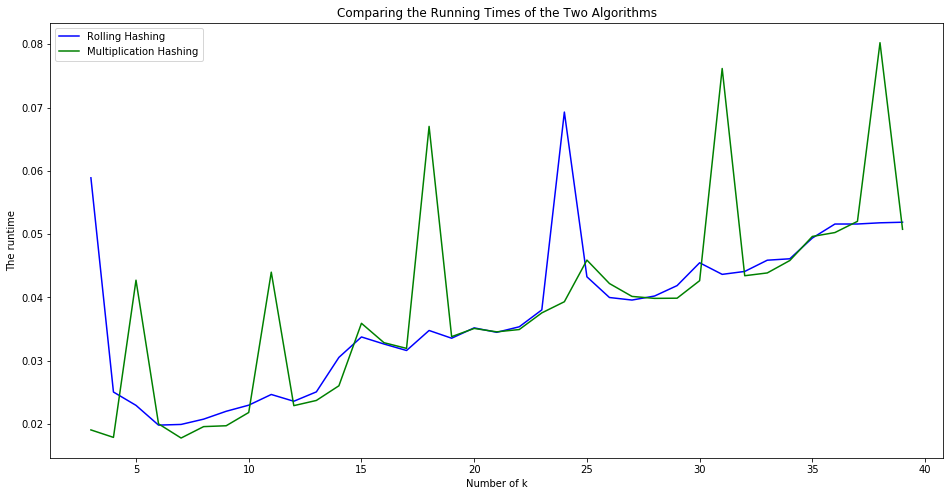

In [10]:
#comparison of the algorithms 

import time
import matplotlib.pyplot as plt

x = shakespeare[:9000]

 
#choosing a random piece of x to be y to have multiple overlaps 
# print(x[:30])
y = x[180:250]
# print(y)

alg_1 = []
alg_2 = []




for k in range (3, 40):
    
    #getting the time for the second function
    start = time.time()
    rh_get_match_2(x, y, k)
    alg_2.append(time.time() - start)
#     print('finished 2')
    #getting the time for the first function
    start1 = time.time()
    rh_get_match(x,y,k)
    alg_1.append(time.time() - start1)
    
x_axis =  [i for i in range (3,40)]

#plotting the outputs 
fig = plt.figure(figsize = (16,8))
plt.plot(x_axis, alg_1, color = 'blue', label = 'Rolling Hashing')
plt.plot(x_axis, alg_2, color = 'green', label = 'Multiplication Hashing')
plt.ylabel("The runtime")
plt.xlabel("Number of k")
plt.title("Comparing the Running Times of the Two Algorithms")


plt.legend()




## HCs and LOs 


### HCs

List all the LOs and HCs you have exercised while working on this final assignment as well as a thorough
justification of their application. Review your previous assignments and in-class grades, and reflect on your
application of these LOS has evolved over time



optimization - when investigating the extent of the algorithm, the choice of the k should be optimized to maximize the finding of the plagiarism without the noise and with effective computational power. Variables of change are the sphere of the paper (is it a unique work or work that will have many repetitive words across inputs) and the size of k. The fixed constraints are the size of the paper and the efficiency of the algorithm. An algorithm is proposed to ask user of an input type how likely will there be repetitive words in the paper) and how they want to analyze the paper - based on words, sentences, or phrases - this is the size of k. The algorithm then calculates the given percentage and outputs the guide on how likely this resemblance is due to noise or actually plagiarism. This information is enough to provide the global solution - either by changing the input parameters or by accepting the percentage of plagiarism solution. 




selfawareness  - with the end of the semester and much work on finals, I needed to develop the strategy to complete all my assignments before a strict deadline. Based on the information I learned in freshman year about the better concentration and creative thinking setups and my experience under the large workload, I have developed a strategy. I have allocated the most time to this assignment - 3 days - because previous experience showed that I work best with breaks several days in a row, since brainstorming and developing code requires much concentration from me and if I am working for more than 6 hours straight, I usually fall for some pitfall and get stuck in some bug for a really long time. However, on the next day, I always manage to solve the bug fast. More than that, I split the types of work based on my mood - when I am more happy, I select more creative work as developing but when my mood is down and it is really hard to make myself do work, I write justification, explanations, format the code, write the HCs. This is based on the matecogonition. More than that, this is a persuasion technique for me on when I want to procrastinate instead of doing work. I already know I am not in the best mood and do not have a strong desire to do my assignments, and writing work is not hard for me so it is much easier for me to make myself complete my work. Justifying to myself that I am in a mood that is a great fit for this type of work is the technique I have found to be working the best for.


rightproblem - for the choice of the hash function for the second part of the algorithm, I framed with problem, and it helped me to arrive at an optimal solution. Since I was not using the division method anymore, I started research multiple hashing techniques, keeping in mind the purposes - making a better distribution of values accross the ahs table so the more slower hash function could still compete with a fast rolling hashing, very suitable for plagiarism problem. The scope of my problem was defined at the local level of the algorithm but would affect the total performance. The obstacle I had was my limited knowledge of the other hashing functions and their applicability to my specific function as compared to the rolling hashing. Therefore, I have selected several hashing methods I liked and ran them in my algorithm to see the elements per bucket distribution. The adapted multiplication method sorted on average a load of 2 elements per bucket and it outperformed the other candidate - the trivial hash function with the string converted to integer being the only operation and the mid squares. You can see the code for the multiplicative method in the notebook. As a result, I have selected the most efficient function and compared it to the rolling hashing. Even though the function is slower, both of them perform similarly - so its bucketing is more efficient than the rolling hash. As a result, the choice of the algorithm has helped me to achieve my goal. 



### LOs


codereadability - the functions are recycled for the code to be concise, the functions have a function string explaining the function, code has comments and is nicely separated

pythonprogramming - the functions are implemented based on the tasks and they are working as intended with test cases for individual helper function and the main function, as well. 

complexityanalysis - the functions are compared and contrasted in terms of their asymptotic behavior and also in term of the runtime on the specific input. Both of the functions have a clear, step-by-step broken down performance analyzed. 


computantionalcritique - the two algorithms are contrasted based on their runtime, their hash functions, and complexity. The analysis highlights the differences and also points out that the constants cancel out the different speeds of the hash functions that make the runtime very similar to each other.




### Reflection on th LOs improvement 


In the beginning of the semester, I was not sure how to apply the HCs and LOs to the code because it was new. As I was gaining more experience and received very helpful feedback throughout the semester with the pre-class work submissions, I have learned which repetitive mistakes I was making and which points  I was not referencing to get a higher score. Through the interactive applied learning, I hope now I code better. 